## References
 - __[Script: Kaggle](https://www.kaggle.com/code/ilaydadu/video-game-sales-visualization-with-plotly)__
 - __[Dataset: Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)__

# Conclusion
## Worldwide
> Market-wise: 
> - North America dominates, followed by Europe <br>
> 
> Publishers:  <br>
> - Nintendo: dominates for ~30years. Genres are diverse <br>
> - EA: specialize in sports genre (41%) <br>
> - Activision: specialize in shooters genre (43%) <br>
> - Sony makes more money from selling consoles than selling games (4th in publisher, 1st in consoles) <br>
> 
> Genres:  <br>
> - Before '98, platform genre dominates.  <br>
> - '98 onwards, action & sports dominate. <br> 
> 
> Consoles:
> - Sony PS > ~3x Microsoft Xbox > ~1x Nintendo Wii <br>

## Regionals
> - Publishers: Nintendo 1st place for all regions, except Other <br>
> - Genre: Action 1st place for all regions, except Japan <br>
> - Game: #1 game belong to Nintendo in all regions, except Other <br>


## Brainstorming


High level
- ~Count of platform, genre, publisher~

Worldwide
- ~Total sales by year (line graph)~
- ~Top 5 (Platform, Genre, Publisher)~
- ~Top 5 games - how long they stay famous/relevant?~ Note: No yearly sales data of any particular games to analyze
- ~Top 3 publishers - their business over the years? profit made?~ Note: Nintendo domanited market for ~30years. Sony made more money from selling consoles, than game
- ~Top 5 Genre - how does it evolve over time?~ Note: Before '98, Platform dominates. '98 onwards, action & sports dominate.
- ~Top 3 publishers and their favourite genres (pie chart)?~ Note: EA: Sports , Activision: Shooters
- ~Bottom 3 publishers? what went wrong?~ Note: too little info/data to go on.

Regions
- ~Top 5 (Platform, Year, Genre, Publisher)~

Others
- ~Top 100 Video Games, Release Years, Publishers and Sales~

# Dataset

In [6]:
# Importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [7]:
# Read datasets
df = pd.read_csv('../Python/Input/Video Game Sales/vgsales.csv')

df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [8]:
# Notes
# - Dataset contains null: Year, Publisher
# - No extra efforts taken to fill in missing information manually. Instead, drop them
df.dropna(inplace=True)
df = df.astype({'Year': 'int64'})

df.info()
# display(df[df.Year.isnull()])
# display(df[df.Publisher.isnull()])

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [9]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

# Color Palette
- Source: https://piktochart.com/tips/gaming-color-palette

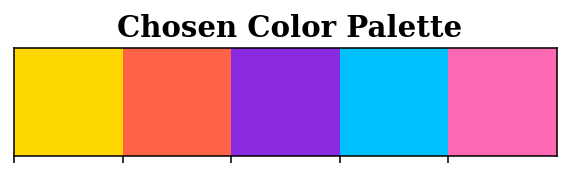

In [11]:
# Palette
col    = ['#ffd700', '#ff6347', '#8a2be2','#00bfff','#ff69b4']
background_color = "#fafafa"
sns.palplot(col)

# Plot
plt.title("Chosen Color Palette ",loc='left',fontfamily='serif',fontsize=15,y=1,x=0.19,fontweight='bold')
plt.show()

# Worldwide

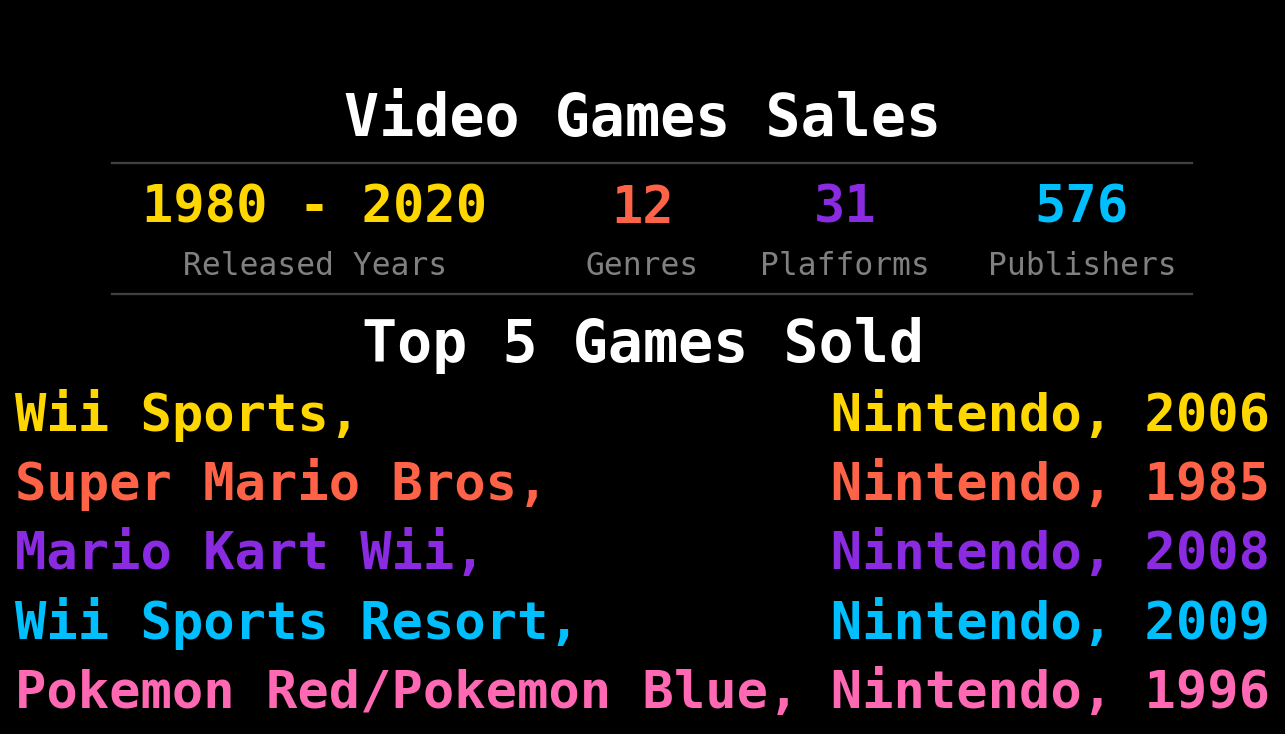

In [13]:
fig = plt.figure(figsize=(6,3),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.2, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])

fig.patch.set_facecolor('black') # figure background color
ax0.set_facecolor('black') 

ax0.text(0.47,0.65,"Video Games Sales",color='white',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"1980 - 2020",color=col[0],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.25,"Released Years",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(0.47,0.4,len(df.Genre.value_counts()),color=col[1],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.47,0.25,"Genres",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(0.76,0.4,len(df.Platform.value_counts()),color=col[2],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.76,0.25,"Plafforms",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(1.1,0.4,len(df.Publisher.value_counts()),color=col[3],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.1,0.25,"Publishers",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(0.47,0,"Top 5 Games Sold",color='white',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0.47,-0.2,"Wii Sports,               Nintendo, 2006",color=col[0],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.47,-0.4,"Super Mario Bros,         Nintendo, 1985",color=col[1],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.47,-0.6,"Mario Kart Wii,           Nintendo, 2008",color=col[2],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.47,-0.8,"Wii Sports Resort,        Nintendo, 2009",color=col[3],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.47,-1,"Pokemon Red/Pokemon Blue, Nintendo, 1996",color=col[4],fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis='both',length=0)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)

import matplotlib.lines as lines
l1 = lines.Line2D([-0.1, 1.1], [0.55, 0.55], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l1])
l1 = lines.Line2D([-0.1, 1.1], [0.26, 0.26], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l1])

plt.show()

In [14]:
data = df.groupby(['Year'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()#.reset_index()
data.rename(columns={'NA_Sales':'North America','EU_Sales':'Europe','JP_Sales':'Japan','Other_Sales':'Other','Global_Sales':'Global'}, inplace=True)

display(data)

North America  Europe  Japan  Other  Global
Year                                             
1980          10.59    0.67   0.00   0.12   11.38
1981          33.40    1.96   0.00   0.32   35.77
1982          26.92    1.65   0.00   0.31   28.86
1983           7.76    0.80   8.10   0.14   16.79
1984          33.28    2.10  14.27   0.70   50.36
1985          33.73    4.74  14.56   0.92   53.94
1986          12.50    2.84  19.81   1.93   37.07
1987           8.46    1.41  11.63   0.20   21.74
1988          23.87    6.59  15.76   0.99   47.22
1989          45.15    8.44  18.36   1.50   73.45
1990          25.46    7.63  14.88   1.40   49.39
1991          12.76    3.95  14.78   0.74   32.23
1992          33.87   11.71  28.91   1.65   76.16
1993          15.12    4.65  25.33   0.89   45.98
1994          28.15   14.88  33.99   2.20   79.17
1995          24.82   14.90  45.75   2.64   88.11
1996          86.76   47.26  57.44   7.69  199.15
1997          94.75   48.32  48.87   9.13  200.98
1998         128.36   66.90  50.04  11.03  256.47
1999         126.06   62.67  52.34  10.05  251.27
2000          94.49   52.75  42.77  11.62  201.56
2001         173.98   94.89  39.86  22.76  331.47
2002         216.19  109.74  41.76  27.28  395.52
2003         193.59  103.81  34.20  26.01  357.85
2004         218.80  105.92  41.65  47.24  414.01
2005         241.58  121.56  54.28  40.55  458.51
2006         263.12  129.24  73.73  54.43  521.04
2007         311.18  160.18  60.29  77.58  609.92
2008         351.44  184.40  60.26  82.39  678.90
2009         338.85  191.59  61.89  74.77  667.30
2010         304.24  176.57  59.49  59.90  600.29
2011         241.00  167.31  53.04  54.39  515.80
2012         154.93  118.76  51.74  37.82  363.49
2013         154.77  125.80  47.59  39.82  368.11
2014         131.97  125.63  39.46  40.02  337.03
2015         102.82   97.71  33.72  30.01  264.44
2016          22.66   26.76  13.67   7.75   70.90
2017           0.00    0.00   0.05   0.00    0.05
2020           0.27    0.00   0.00   0.02    0.29

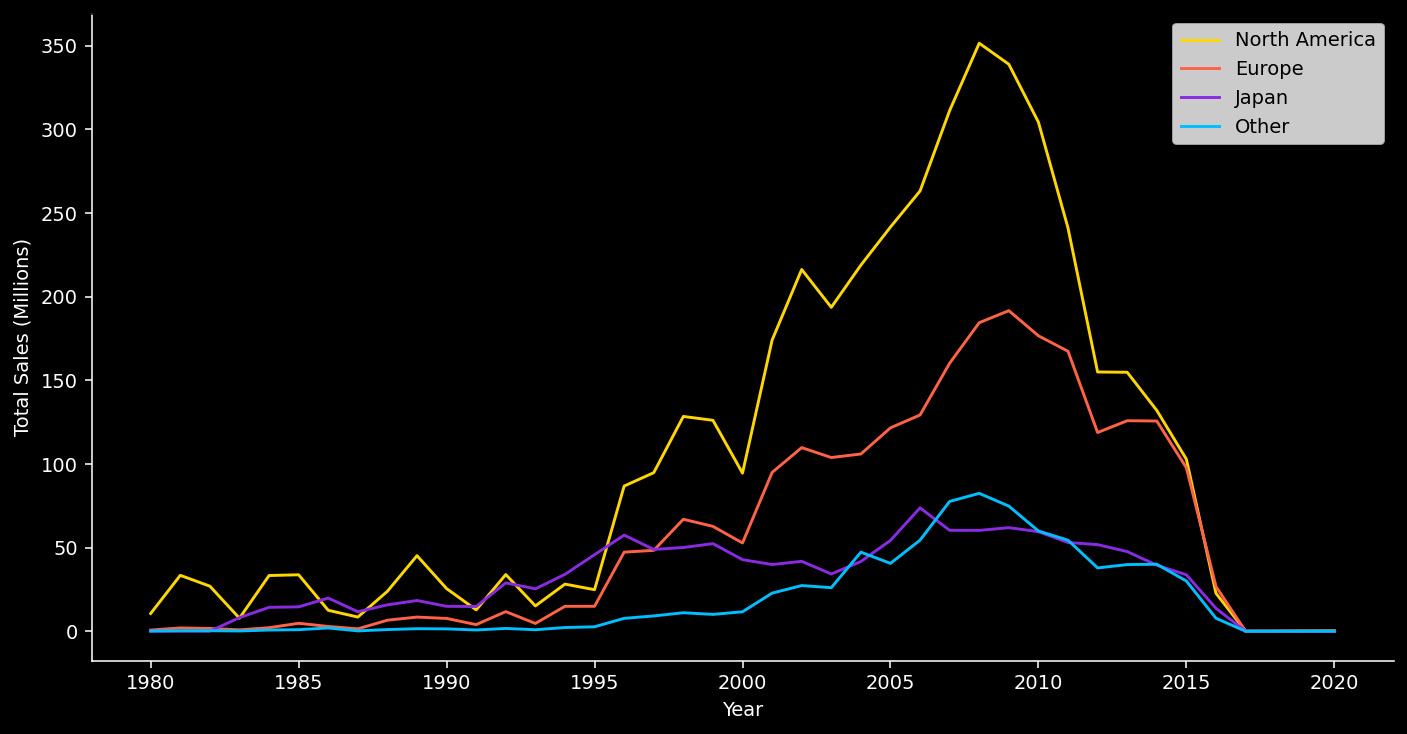

In [15]:
column   = data.columns

# Plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i in range(0,len(column)-1):
    ax.plot(data.index, data[column[i]], color=col[i], label=column[i])

# for s in ['top', 'right','bottom','left']:
#     ax.spines[s].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis=u'both', which=u'both', color='white')
[t.set_color('white') for t in ax.xaxis.get_ticklabels()]
[t.set_color('white') for t in ax.yaxis.get_ticklabels()]

ax.grid(False)

fig.patch.set_facecolor('black')
ax.set_facecolor('black') 
plt.legend()
ax.set(xlabel='Year', ylabel='Total Sales (Millions)')

plt.show()

In [16]:
# Top 5 (Platform, Genre, Publisher)
top_plat = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()[:5]
top_gen = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()[:5]
top_pub = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index()[:5]

display(top_plat)
display(top_gen)
display(top_pub)

Platform  Global_Sales
0      PS2       1233.46
1     X360        969.60
2      PS3        949.35
3      Wii        909.81
4       DS        818.91

Genre  Global_Sales
0        Action       1722.84
1        Sports       1309.24
2       Shooter       1026.20
3  Role-Playing        923.83
4      Platform        829.13

Publisher  Global_Sales
0                     Nintendo       1784.43
1              Electronic Arts       1093.39
2                   Activision        721.41
3  Sony Computer Entertainment        607.28
4                      Ubisoft        473.54

In [17]:
# Sony, Microsoft, Nintendo
# display(df[df['Platform'].str.contains("PS")].groupby('Platform')['Global_Sales'].count().reset_index())
# display(df[df['Platform'].str.contains("X")].groupby('Platform')['Global_Sales'].count().reset_index())
# display(df[df['Platform'].str.contains("W")].groupby('Platform')['Global_Sales'].count().reset_index())

print('Assumption: Due to the lack of data, assumed 1 console bought per game.')
# print('Sony Playstation:', df[df['Platform'].str.contains("PS")]['Global_Sales'].count())
# print('Microsoft Xbox:', df[df['Platform'].str.contains("X")]['Global_Sales'].count())
# print('Nintendo Wii:', df[df['Platform'].str.contains("W")]['Global_Sales'].count())

con = {'Consoles': ['Sony Playstation', 'Microsoft Xbox', 'Nintendo Wii'], 
       'Count': [df[df['Platform'].str.contains("PS")]['Global_Sales'].count(),          
                 df[df['Platform'].str.contains("X")]['Global_Sales'].count(),         
                 df[df['Platform'].str.contains("W")]['Global_Sales'].count()]}
cons = pd.DataFrame(data=con)
display(cons)

Assumption: Due to the lack of data, assumed 1 console bought per game.


Consoles  Count
0  Sony Playstation   6563
1    Microsoft Xbox   2251
2      Nintendo Wii   1439

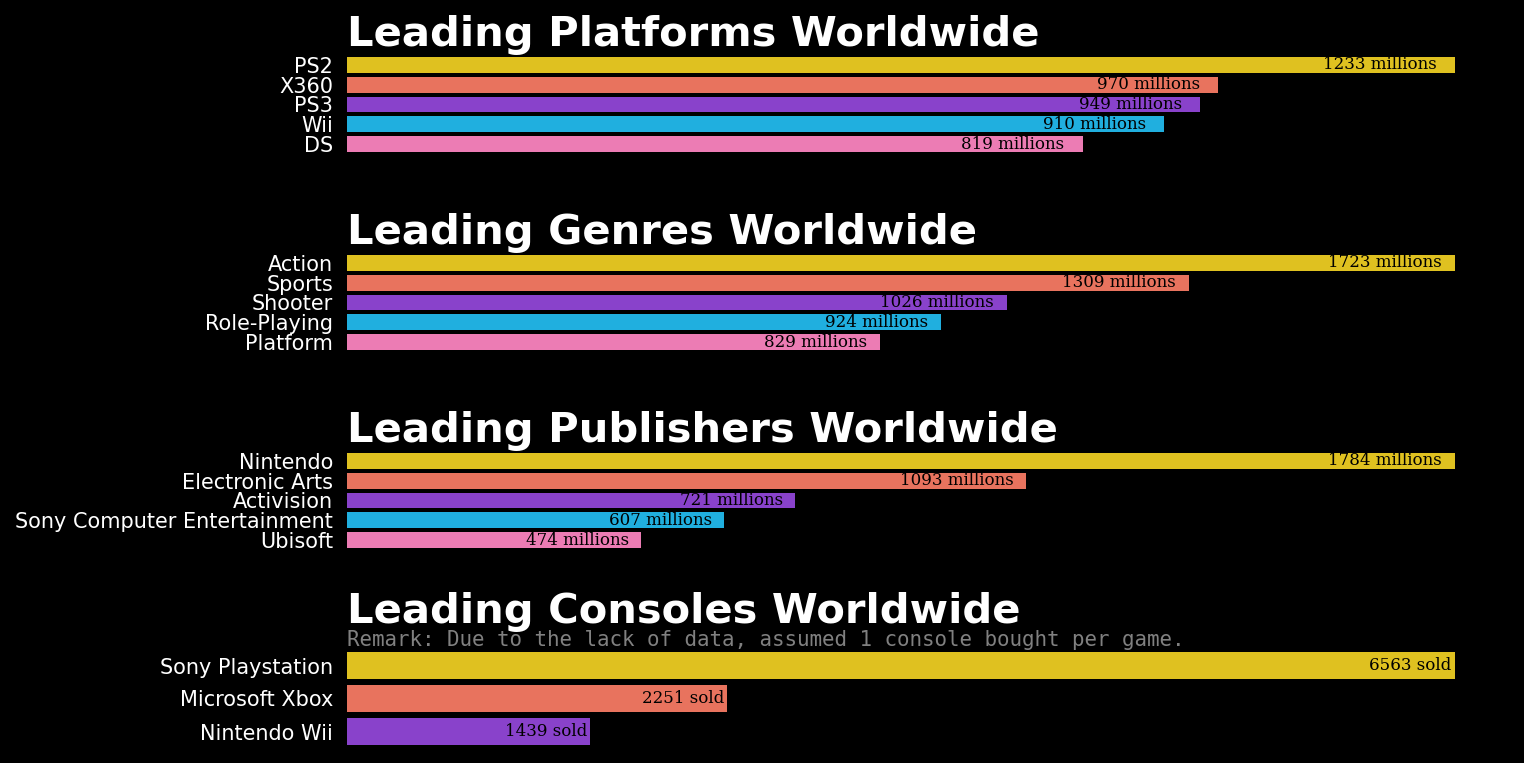

In [18]:
# Plots
fig = plt.figure(figsize=(10, 6),dpi=150, facecolor='black')
gs = fig.add_gridspec(7, 1)
gs.update(wspace=0, hspace=0)

#########################################################################################################################

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor('black')
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax0.text(0, -0.5, 'Leading Platforms Worldwide', color='white', fontsize=20, ha='left', va='bottom', weight='bold')
sns.barplot(data=top_plat, x='Global_Sales', y='Platform', palette=col, zorder=2, orient='h')
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.grid(False)
[t.set_color('white') for t in ax0.yaxis.get_ticklabels()]

labels = top_plat['Global_Sales'].values.tolist()
for i in range(0,5):
    ax0.annotate("{:.0f} millions".format(labels[i]), 
                   xy=(top_plat['Global_Sales'][i]-20, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)

#########################################################################################################################

ax1 = fig.add_subplot(gs[2, 0])
ax1.set_facecolor('black')
for s in ["right", "top","bottom","left"]:
    ax1.spines[s].set_visible(False)
ax1.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax1.text(0, -0.5, 'Leading Genres Worldwide', color='white', fontsize=20, ha='left', va='bottom', weight='bold')
sns.barplot(data=top_gen, x='Global_Sales', y='Genre', palette=col, zorder=2, orient='h')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.grid(False)

labels = top_gen['Global_Sales'].values.tolist()
for i in range(0,5):
    ax1.annotate("{:.0f} millions".format(labels[i]), 
                   xy=(top_gen['Global_Sales'][i]-20, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)

[t.set_color('white') for t in ax1.yaxis.get_ticklabels()]

#########################################################################################################################

ax1 = fig.add_subplot(gs[4, 0])
ax1.set_facecolor('black')
for s in ["right", "top","bottom","left"]:
    ax1.spines[s].set_visible(False)
ax1.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax1.text(0, -0.5, 'Leading Publishers Worldwide', color='white', fontsize=20, ha='left', va='bottom', weight='bold')
sns.barplot(data=top_pub, x='Global_Sales', y='Publisher', palette=col, zorder=2, orient='h')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.grid(False)

labels = top_pub['Global_Sales'].values.tolist()
for i in range(0,5):
    ax1.annotate("{:.0f} millions".format(labels[i]), 
                   xy=(top_pub['Global_Sales'][i]-20, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
[t.set_color('white') for t in ax1.yaxis.get_ticklabels()]

#########################################################################################################################

ax1 = fig.add_subplot(gs[6, 0])
ax1.set_facecolor('black')
for s in ["right", "top","bottom","left"]:
    ax1.spines[s].set_visible(False)
ax1.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax1.text(0, -1, 'Leading Consoles Worldwide', color='white', fontsize=20, ha='left', va='bottom', weight='bold')
ax1.text(0,-0.6,"Remark: Due to the lack of data, assumed 1 console bought per game.",color='gray',fontsize=10, fontfamily='monospace',ha='left')

sns.barplot(data=cons, x='Count', y='Consoles', palette=col, zorder=2, orient='h')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.grid(False)

labels = cons['Count'].values.tolist()
for i in range(0,3):
    ax1.annotate("{} sold".format(labels[i]), 
                   xy=(cons['Count'][i]-20, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
[t.set_color('white') for t in ax1.yaxis.get_ticklabels()]

plt.show()

In [19]:
df_pub = df.loc[(df.Publisher == 'Nintendo') | (df.Publisher == 'Electronic Arts') | (df.Publisher == 'Activision')]
df_pub = df_pub.groupby(['Year','Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

display(df_pub)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year Publisher                                                               
1980 Activision           2.82      0.18      0.00         0.03          3.02
1981 Activision           7.95      0.46      0.00         0.08          8.50
1982 Activision           1.75      0.11      0.00         0.03          1.86
1983 Activision           1.81      0.11      0.00         0.02          1.94
     Nintendo             2.32      0.46      8.10         0.08         10.96
...                        ...       ...       ...          ...           ...
2015 Electronic Arts     17.62     21.14      0.62         6.03         45.42
     Nintendo             9.25      7.49      8.57         1.77         27.08
2016 Activision           1.67      1.39      0.14         0.44          3.67
     Electronic Arts      3.64      6.91      0.09         1.63         12.25
     Nintendo             1.16      0.93      1.17         0.20          3.47

[90 rows x 5 columns]

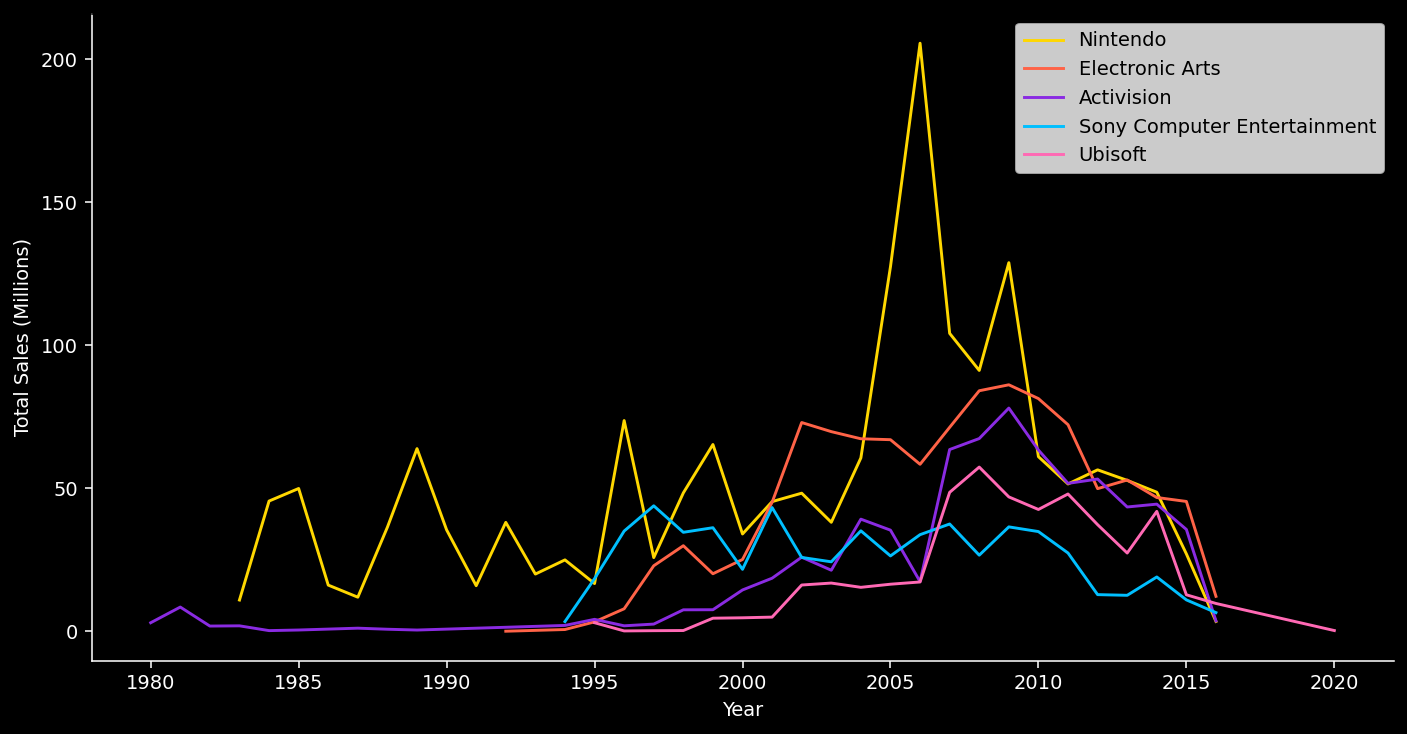

In [20]:
# Plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

pub = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft']
                                                     
for i in range(0,len(pub)):
    data = df.loc[(df.Publisher == pub[i])].groupby('Year')['Global_Sales'].sum().reset_index()
    ax.plot(data.Year, data.Global_Sales, color=col[i], label=pub[i])

# # for s in ['top', 'right','bottom','left']:
# #     ax.spines[s].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis=u'both', which=u'both', color='white')
[t.set_color('white') for t in ax.xaxis.get_ticklabels()]
[t.set_color('white') for t in ax.yaxis.get_ticklabels()]

# ax.grid(False)

fig.patch.set_facecolor('black')
ax.set_facecolor('black') 
plt.legend()
ax.set(xlabel='Year', ylabel='Total Sales (Millions)')

plt.show()

In [21]:
data = df.loc[(df.Genre == 'Action') | (df.Genre == 'Sports') | (df.Genre == 'Shooter')]
data = data.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()

display(data)

Year    Genre  Global_Sales
0    1980   Action          0.34
1    1980  Shooter          7.07
2    1980   Sports          0.49
3    1981   Action         14.84
4    1981  Shooter         10.04
..    ...      ...           ...
106  2015   Sports         41.54
107  2016   Action         19.90
108  2016  Shooter         18.22
109  2016   Sports         14.60
110  2017   Action          0.01

[111 rows x 3 columns]

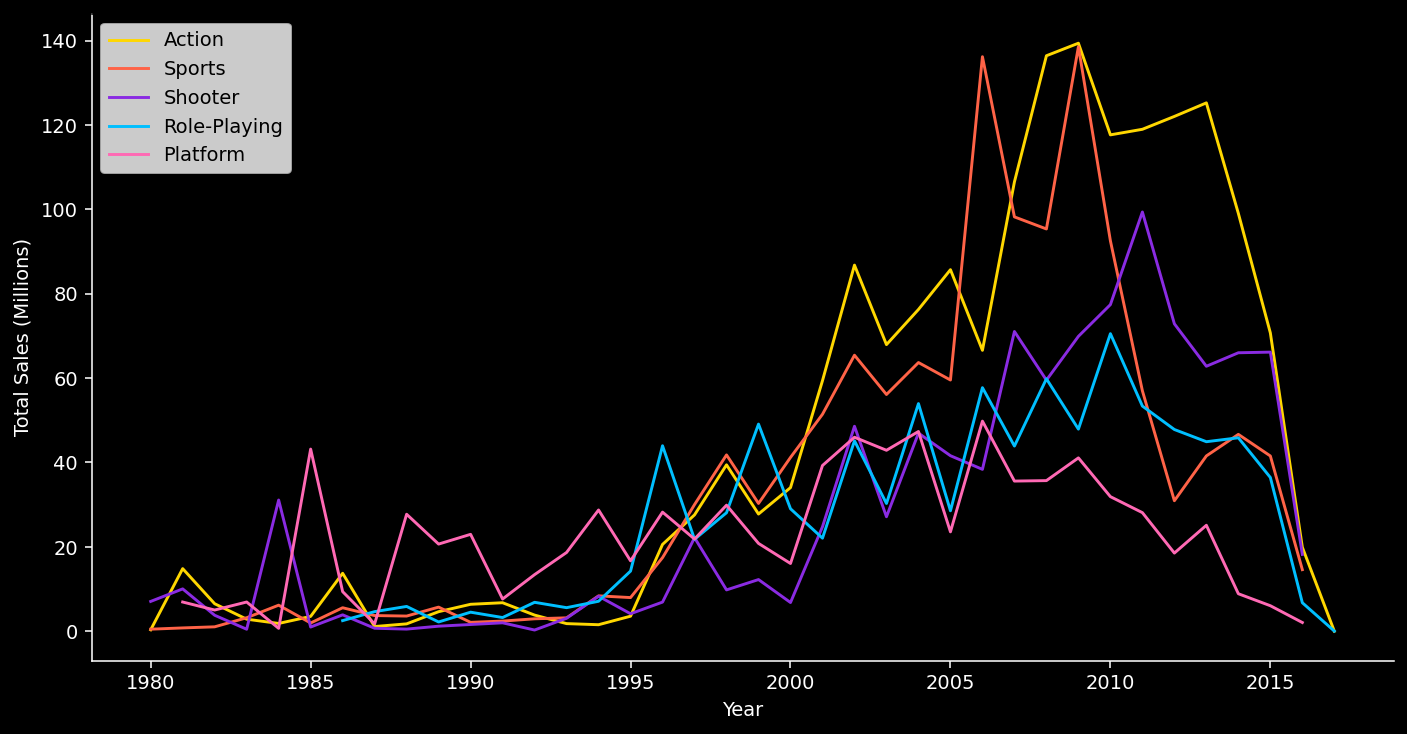

In [22]:
# Plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

gen = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']
                                                     
for i in range(0,len(gen)):
    data = df.loc[(df.Genre == gen[i])].groupby('Year')['Global_Sales'].sum().reset_index()
    ax.plot(data.Year, data.Global_Sales, color=col[i], label=gen[i])

# # for s in ['top', 'right','bottom','left']:
# #     ax.spines[s].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis=u'both', which=u'both', color='white')
[t.set_color('white') for t in ax.xaxis.get_ticklabels()]
[t.set_color('white') for t in ax.yaxis.get_ticklabels()]

# ax.grid(False)

fig.patch.set_facecolor('black')
ax.set_facecolor('black') 
plt.legend()
ax.set(xlabel='Year', ylabel='Total Sales (Millions)')

plt.show()

In [23]:
data   = df.loc[(df.Publisher == 'Nintendo')].groupby(['Genre'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).reset_index().drop(['index'], axis=1)
others = {'Genre': 'Others', 'Global_Sales': data.loc[3:,['Global_Sales']].sum().values[0]}
data   = pd.concat([data.loc[:2,:], pd.DataFrame([others])], ignore_index=True)

display(data)

Genre  Global_Sales
0      Platform        426.18
1  Role-Playing        284.57
2        Sports        218.01
3        Others        855.67

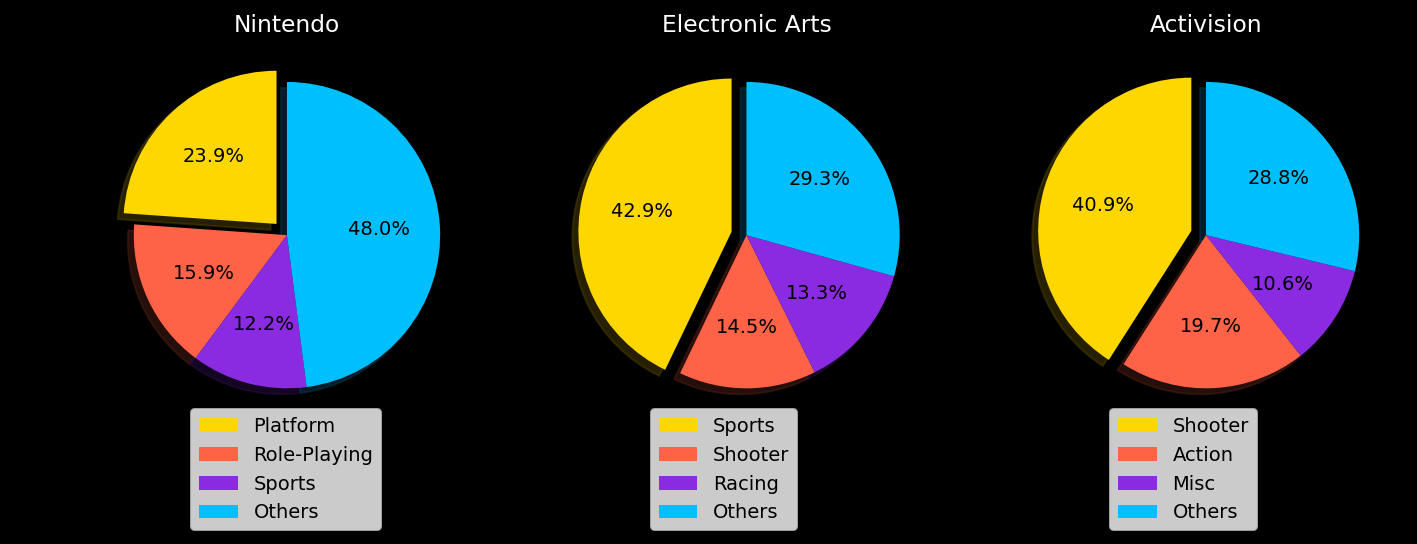

In [24]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))
fig.patch.set_facecolor('black')

gs = fig.add_gridspec(1, 3)
gs.update(wspace=0, hspace=0)

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

#########################################################################################################################

explode = (0.1, 0, 0, 0)

pub    = 'Nintendo'
data   = df.loc[(df.Publisher == pub)].groupby(['Genre'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).reset_index().drop(['index'], axis=1)
others = {'Genre': 'Others', 'Global_Sales': data.loc[3:,['Global_Sales']].sum().values[0]}
data   = pd.concat([data.loc[:2,:], pd.DataFrame([others])], ignore_index=True)
ax0.pie(data.Global_Sales, labels=data.Genre, autopct='%1.1f%%', 
        colors=col, explode=explode, shadow=True, startangle=90, radius=1)
ax0.legend(loc=[0.25,-0.27])
ax0.set_title(pub)
ax0.title.set_color('white')

#########################################################################################################################

pub    = 'Electronic Arts'
data   = df.loc[(df.Publisher == pub)].groupby(['Genre'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).reset_index().drop(['index'], axis=1)
others = {'Genre': 'Others', 'Global_Sales': data.loc[3:,['Global_Sales']].sum().values[0]}
data   = pd.concat([data.loc[:2,:], pd.DataFrame([others])], ignore_index=True)
ax1.pie(data.Global_Sales, labels=data.Genre, autopct='%1.1f%%', 
        colors=col, explode=explode, shadow=True, startangle=90, radius=1)
ax1.legend(loc=[0.25,-0.27])
ax1.set_title(pub)
ax1.title.set_color('white')

#########################################################################################################################

pub    = 'Activision'
data   = df.loc[(df.Publisher == pub)].groupby(['Genre'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).reset_index().drop(['index'], axis=1)
others = {'Genre': 'Others', 'Global_Sales': data.loc[3:,['Global_Sales']].sum().values[0]}
data   = pd.concat([data.loc[:2,:], pd.DataFrame([others])], ignore_index=True)
ax2.pie(data.Global_Sales, labels=data.Genre, autopct='%1.1f%%', 
        colors=col, explode=explode, shadow=True, startangle=90, radius=1)
ax2.legend(loc=[0.25,-0.27])
ax2.set_title(pub)
ax2.title.set_color('white')

#########################################################################################################################
plt.show()

# Regionals

In [26]:
na_pub     = df.groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales',ascending=False)[:5]
eu_pub     = df.groupby('Publisher')['EU_Sales'].sum().reset_index().sort_values('EU_Sales',ascending=False)[:5]
jp_pub     = df.groupby('Publisher')['JP_Sales'].sum().reset_index().sort_values('JP_Sales',ascending=False)[:5]
other_pub  = df.groupby('Publisher')['Other_Sales'].sum().reset_index().sort_values('Other_Sales',ascending=False)[:5]
global_pub = df.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)[:5]

na_gen     = df.groupby('Genre')['NA_Sales'].sum().reset_index().sort_values('NA_Sales',ascending=False)[:5]
eu_gen     = df.groupby('Genre')['EU_Sales'].sum().reset_index().sort_values('EU_Sales',ascending=False)[:5]
jp_gen     = df.groupby('Genre')['JP_Sales'].sum().reset_index().sort_values('JP_Sales',ascending=False)[:5]
other_gen  = df.groupby('Genre')['Other_Sales'].sum().reset_index().sort_values('Other_Sales',ascending=False)[:5]
global_gen = df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)[:5]

na_pla     = df.groupby('Platform')['NA_Sales'].sum().reset_index().sort_values('NA_Sales',ascending=False)[:5]
eu_pla     = df.groupby('Platform')['EU_Sales'].sum().reset_index().sort_values('EU_Sales',ascending=False)[:5]
jp_pla     = df.groupby('Platform')['JP_Sales'].sum().reset_index().sort_values('JP_Sales',ascending=False)[:5]
other_pla  = df.groupby('Platform')['Other_Sales'].sum().reset_index().sort_values('Other_Sales',ascending=False)[:5]
global_pla = df.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)[:5]

na_gam     = df[['Name','NA_Sales']].sort_values('NA_Sales',ascending=False)[:5]
eu_gam     = df[['Name','EU_Sales']].sort_values('EU_Sales',ascending=False)[:5]
jp_gam     = df[['Name','JP_Sales']].sort_values('JP_Sales',ascending=False)[:5]
other_gam  = df[['Name','Other_Sales']].sort_values('Other_Sales',ascending=False)[:5]
global_gam = df[['Name','Global_Sales']].sort_values('Global_Sales',ascending=False)[:5]

display(na_pub)

Publisher  NA_Sales
359                     Nintendo    815.75
138              Electronic Arts    584.22
21                    Activision    426.01
455  Sony Computer Entertainment    265.22
524                      Ubisoft    252.81

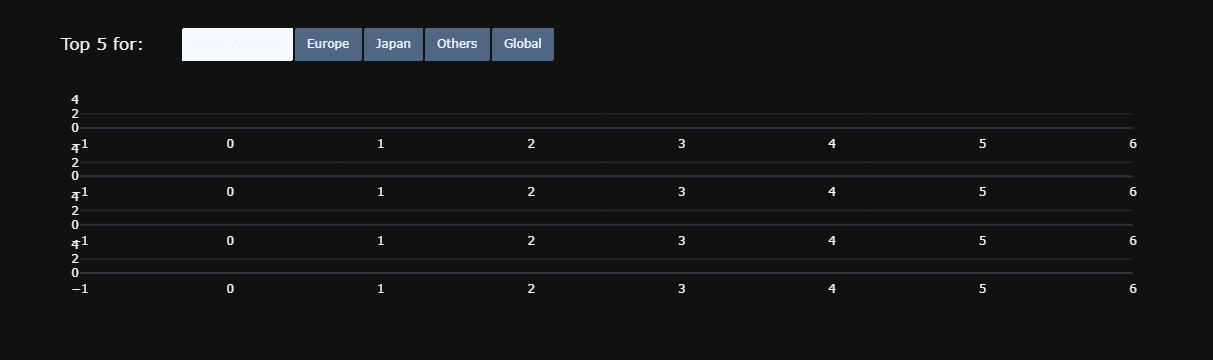

In [27]:
from plotly.subplots import make_subplots

fig = make_subplots(4,1)

fig.add_bar(x=na_pub['Publisher'],
            y=na_pub['NA_Sales'],
            row=1, col=1, visible=False,
            name='Publisher',
            marker = {'color' : col[0],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=na_gen['Genre'],
            y=na_gen['NA_Sales'],
            row=2, col=1, visible=False, 
            name='Genre',
            marker = {'color' : col[1],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=na_pla['Platform'],
            y=na_pla['NA_Sales'],
            row=3, col=1, visible=False, 
            name='Platform',
            marker = {'color' : col[2],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=na_gam['Name'].values,
            y=na_gam['NA_Sales'].values,
            row=4, col=1, visible=False, 
            name='Game',
            marker = {'color' : col[3],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})

fig.add_bar(x=eu_pub['Publisher'],
            y=eu_pub['EU_Sales'],
            row=1, col=1, visible=False,
            name='Publisher',
            marker = {'color' : col[0],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=eu_gen['Genre'],
            y=eu_gen['EU_Sales'],
            row=2, col=1, visible=False, 
            name='Genre',
            marker = {'color' : col[1],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=eu_pla['Platform'],
            y=eu_pla['EU_Sales'],
            row=3, col=1, visible=False, 
            name='Platform',
            marker = {'color' : col[2],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=eu_gam['Name'].values,
            y=eu_gam['EU_Sales'].values,
            row=4, col=1, visible=False, 
            name='Game',
            marker = {'color' : col[3],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})

fig.add_bar(x=jp_pub['Publisher'],
            y=jp_pub['JP_Sales'],
            row=1, col=1, visible=False,
            name='Publisher',
            marker = {'color' : col[0],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=jp_gen['Genre'],
            y=jp_gen['JP_Sales'],
            row=2, col=1, visible=False, 
            name='Genre',
            marker = {'color' : col[1],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=jp_pla['Platform'],
            y=jp_pla['JP_Sales'],
            row=3, col=1, visible=False, 
            name='Platform',
            marker = {'color' : col[2],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=jp_gam['Name'].values,
            y=jp_gam['JP_Sales'].values,
            row=4, col=1, visible=False, 
            name='Game',
            marker = {'color' : col[3],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})

fig.add_bar(x=other_pub['Publisher'],
            y=other_pub['Other_Sales'],
            row=1, col=1, visible=False,
            name='Publisher',
            marker = {'color' : col[0],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=other_gen['Genre'],
            y=other_gen['Other_Sales'],
            row=2, col=1, visible=False, 
            name='Genre',
            marker = {'color' : col[1],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=other_pla['Platform'],
            y=other_pla['Other_Sales'],
            row=3, col=1, visible=False, 
            name='Platform',
            marker = {'color' : col[2],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=other_gam['Name'].values,
            y=other_gam['Other_Sales'].values,
            row=4, col=1, visible=False, 
            name='Game',
            marker = {'color' : col[3],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})

fig.add_bar(x=global_pub['Publisher'],
            y=global_pub['Global_Sales'],
            row=1, col=1, visible=False,
            name='Publisher',
            marker = {'color' : col[0],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=global_gen['Genre'],
            y=global_gen['Global_Sales'],
            row=2, col=1, visible=False, 
            name='Genre',
            marker = {'color' : col[1],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=global_pla['Platform'],
            y=global_pla['Global_Sales'],
            row=3, col=1, visible=False, 
            name='Platform',
            marker = {'color' : col[2],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})
fig.add_bar(x=global_gam['Name'].values,
            y=global_gam['Global_Sales'].values,
            row=4, col=1, visible=False, 
            name='Game',
            marker = {'color' : col[3],
                      'line'  : {'color' :'rgb(0,0,0)','width' :1.5}})

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.45,
            y=1.4,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, True, True, True,
                                        False, False, False, False,
                                        False, False, False, False,
                                        False, False, False, False,
                                        False, False, False, False]}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False, False, False, False,
                                        True, True, True, True,
                                        False, False, False, False,
                                        False, False, False, False,
                                        False, False, False, False]}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False, False, False, False,
                                        False, False, False, False,
                                        True, True, True, True,
                                        False, False, False, False,
                                        False, False, False, False]}]),
                dict(label="Others",
                     method="update",
                      args=[{"visible": [False, False, False, False, 
                                        False, False, False, False,
                                        False, False, False, False,
                                        True, True, True, True,
                                        False, False, False, False,]}]),
                dict(label="Global",
                     method="update",
                      args=[{"visible": [False, False, False, False, 
                                        False, False, False, False,
                                        False, False, False, False,
                                        False, False, False, False,
                                        True, True, True, True,]}]),
            ]),
        )
    ])

fig.update_layout(template= "plotly_dark", 
                  title_text="Top 5 for: ")
fig.show()

# Others

In [29]:
vg1000=df.iloc[:100,:]
vg1000["normalizesales"] = (vg1000["Global_Sales"] - np.min(vg1000["Global_Sales"]))/(np.max(vg1000["Global_Sales"])-np.min(vg1000["Global_Sales"]))

display(vg1000)

Rank                                    Name Platform  Year         Genre  \
0      1                              Wii Sports      Wii  2006        Sports   
1      2                       Super Mario Bros.      NES  1985      Platform   
2      3                          Mario Kart Wii      Wii  2008        Racing   
3      4                       Wii Sports Resort      Wii  2009        Sports   
4      5                Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
..   ...                                     ...      ...   ...           ...   
95    96  Crash Bandicoot 2: Cortex Strikes Back       PS  1997      Platform   
96    97                     Super Mario Bros. 2      NES  1988      Platform   
97    98     Super Smash Bros. for Wii U and 3DS      3DS  2014      Fighting   
98    99              Call of Duty: World at War     X360  2008       Shooter   
99   100                           Battlefield 3     X360  2011       Shooter   

                      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                      Nintendo     41.49     29.02      3.77         8.46   
1                      Nintendo     29.08      3.58      6.81         0.77   
2                      Nintendo     15.85     12.88      3.79         3.31   
3                      Nintendo     15.75     11.01      3.28         2.96   
4                      Nintendo     11.27      8.89     10.22         1.00   
..                          ...       ...       ...       ...          ...   
95  Sony Computer Entertainment      3.78      2.17      1.31         0.31   
96                     Nintendo      5.39      1.18      0.70         0.19   
97                     Nintendo      3.24      1.35      2.42         0.43   
98                   Activision      4.79      1.90      0.00         0.69   
99              Electronic Arts      4.46      2.13      0.06         0.69   

    Global_Sales  normalizesales  
0          82.74        1.000000  
1          40.24        0.436340  
2          35.82        0.377719  
3          33.00        0.340318  
4          31.37        0.318700  
..           ...             ...  
95          7.58        0.003183  
96          7.46        0.001592  
97          7.45        0.001459  
98          7.37        0.000398  
99          7.34        0.000000  

[100 rows x 12 columns]

In [30]:
from plotly.offline import init_notebook_mode, iplot

vg1000.Rank=vg1000.Rank.astype("str")
vg1000.Global_Sales=vg1000.Global_Sales.astype("str")
trace1 = go.Scatter3d(
    y=vg1000["Publisher"],
    x=vg1000["Year"],
    z=vg1000["normalizesales"],
    text="Name:"+ vg1000.Name +","+" Rank:" + vg1000.Rank + " Global Sales: " + vg1000["Global_Sales"] +" millions",
    mode='markers',
    marker=dict(
        size=vg1000['NA_Sales'],
        color = vg1000['normalizesales'],
        colorscale = "Rainbow",
        colorbar = dict(title = 'Global Sales'),
        line=dict(color='rgb(200, 110, 67)'),
       
    )
)

data=[trace1]

layout=go.Layout(height=800, width=800, title='Top 100 Video Games, Release Years, Publishers and Sales',
            titlefont=dict(color='rgb(20, 24, 54)'),
            scene = dict(xaxis=dict(title='Year',
                                    titlefont=dict(color='rgb(20, 24, 54)')),
                            yaxis=dict(title='Publisher',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            zaxis=dict(title='Global Sales',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            bgcolor = 'whitesmoke'
                           ))
 
fig=go.Figure(data=data, layout=layout)
iplot(fig)